In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../pruebas_datos/2020-12-03.csv')

In [3]:
data.head()

,time,measurement,site_id,mote_id,sensor_id,sensor_status,sensor_value
0,2020-12-03T00:00:00.263755,battery,parral,00-17-0d-00-00-59-d1-f1,FFC_SENSOR_BAT,FFC_SENSOR_OK,3.1876
1,2020-12-03T00:00:01.508517,battery,parral,00-17-0d-00-00-59-cd-ba,FFC_SENSOR_BAT,FFC_SENSOR_OK,3.1984
2,2020-12-03T00:00:02.233210,battery,parral,00-17-0d-00-00-59-cd-c9,FFC_SENSOR_BAT,FFC_SENSOR_OK,3.1668
3,2020-12-03T00:00:03.477323,battery,parral,00-17-0d-00-00-59-a9-fb,FFC_SENSOR_BAT,FFC_SENSOR_OK,3.1248
4,2020-12-03T00:00:04.178922,battery,parral,00-17-0d-00-00-59-d1-e6,FFC_SENSOR_BAT,FFC_SENSOR_OK,3.1704


Let's build a dataframe with temperature data

In [4]:
data_temp = data[data.measurement == 'air_temp']

In [5]:
data_temp_ok = data_temp[data_temp.sensor_status == 'FFC_SENSOR_OK']

In [13]:
data_temp_ok.head()

,time,measurement,site_id,mote_id,sensor_id,sensor_status,sensor_value
213896,2020-12-03 00:00:02.233210,air_temp,parral,00-17-0d-00-00-59-cd-c9,FFC_SENSOR_SHT3x0,FFC_SENSOR_OK,19.279
213897,2020-12-03 00:00:02.233210,air_temp,parral,00-17-0d-00-00-59-cd-c9,FFC_SENSOR_SHT3x1,FFC_SENSOR_OK,19.957
213898,2020-12-03 00:00:02.233210,air_temp,parral,00-17-0d-00-00-59-cd-c9,FFC_SENSOR_SHT3x2,FFC_SENSOR_OK,20.341
213899,2020-12-03 00:00:02.233210,air_temp,parral,00-17-0d-00-00-59-cd-c9,FFC_SENSOR_SHT3x3,FFC_SENSOR_OK,20.654
213900,2020-12-03 00:00:03.477323,air_temp,parral,00-17-0d-00-00-59-a9-fb,FFC_SENSOR_SHT3x1,FFC_SENSOR_OK,19.936


In [12]:
data_temp_ok['time'] = pd.to_datetime(data_temp_ok['time'])

/var/folders/_z/x0zcrx6j7lqb_z4xl709hdqh0000gn/T/ipykernel_29211/217552090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp_ok['time'] = pd.to_datetime(data_temp_ok['time'])


In [14]:
data_pivot = data_temp_ok.pivot(index='time', columns=['mote_id','sensor_id'], values='sensor_value') 

In [15]:
data_pivot.head()

mote_id                    00-17-0d-00-00-59-cd-c9                    \
sensor_id                        FFC_SENSOR_SHT3x0 FFC_SENSOR_SHT3x1   
time                                                                   
2020-12-03 00:00:02.233210                  19.279            19.957   
2020-12-03 00:00:03.477323                     NaN               NaN   
2020-12-03 00:00:04.178922                     NaN               NaN   
2020-12-03 00:00:06.141080                     NaN               NaN   
2020-12-03 00:00:07.407819                     NaN               NaN   

mote_id                                                         \
sensor_id                  FFC_SENSOR_SHT3x2 FFC_SENSOR_SHT3x3   
time                                                             
2020-12-03 00:00:02.233210            20.341            20.654   
2020-12-03 00:00:03.477323               NaN               NaN   
2020-12-03 00:00:04.178922               NaN               NaN   
2020-12-03 00:00:06.141080               NaN               NaN   
2020-12-03 00:00:07.407819               NaN               NaN   

mote_id                    00-17-0d-00-00-59-a9-fb                    \
sensor_id                        FFC_SENSOR_SHT3x1 FFC_SENSOR_SHT3x2   
time                                                                   
2020-12-03 00:00:02.233210                     NaN               NaN   
2020-12-03 00:00:03.477323                  19.936            20.459   
2020-12-03 00:00:04.178922                     NaN               NaN   
2020-12-03 00:00:06.141080                     NaN               NaN   
2020-12-03 00:00:07.407819                     NaN               NaN   

mote_id                                      00-17-0d-00-00-59-d1-e6  \
sensor_id                  FFC_SENSOR_SHT3x3       FFC_SENSOR_SHT3x0   
time                                                                   
2020-12-03 00:00:02.233210               NaN                     NaN   
2020-12-03 00:00:03.477323            20.742                     NaN   
2020-12-03 00:00:04.178922               NaN                  19.719   
2020-12-03 00:00:06.141080               NaN                     NaN   
2020-12-03 00:00:07.407819               NaN                     NaN   

mote_id                                                         ...  \
sensor_id                  FFC_SENSOR_SHT3x1 FFC_SENSOR_SHT3x2  ...   
time                                                            ...   
2020-12-03 00:00:02.233210               NaN               NaN  ...   
2020-12-03 00:00:03.477323               NaN               NaN  ...   
2020-12-03 00:00:04.178922            20.248            20.478  ...   
2020-12-03 00:00:06.141080               NaN               NaN  ...   
2020-12-03 00:00:07.407819               NaN               NaN  ...   

mote_id                    00-17-0d-00-00-59-cf-ee                    \
sensor_id                        FFC_SENSOR_SHT3x2 FFC_SENSOR_SHT3x3   
time                                                                   
2020-12-03 00:00:02.233210                     NaN               NaN   
2020-12-03 00:00:03.477323                     NaN               NaN   
2020-12-03 00:00:04.178922                     NaN               NaN   
2020-12-03 00:00:06.141080                     NaN               NaN   
2020-12-03 00:00:07.407819                     NaN               NaN   

mote_id                    00-17-0d-00-00-59-cd-db                    \
sensor_id                        FFC_SENSOR_SHT3x0 FFC_SENSOR_SHT3x1   
time                                                                   
2020-12-03 00:00:02.233210                     NaN               NaN   
2020-12-03 00:00:03.477323                     NaN               NaN   
2020-12-03 00:00:04.178922                     NaN               NaN   
2020-12-03 00:00:06.141080                     NaN               NaN   
2020-12-03 00:00:07.407819                     NaN               NaN   

mote_id          

In [16]:
data_pivot.index

DatetimeIndex(['2020-12-03 00:00:02.233210', '2020-12-03 00:00:03.477323',
               '2020-12-03 00:00:04.178922', '2020-12-03 00:00:06.141080',
               '2020-12-03 00:00:07.407819', '2020-12-03 00:00:07.809698',
               '2020-12-03 00:00:08.109810', '2020-12-03 00:00:09.774963',
               '2020-12-03 00:00:11.518271', '2020-12-03 00:00:12.046546',
               ...
               '2020-12-03 23:59:48.728210', '2020-12-03 23:59:49.329289',
               '2020-12-03 23:59:49.780084', '2020-12-03 23:59:50.179587',
               '2020-12-03 23:59:53.047194', '2020-12-03 23:59:53.772134',
               '2020-12-03 23:59:54.099520', '2020-12-03 23:59:55.289585',
               '2020-12-03 23:59:57.740145', '2020-12-03 23:59:58.538889'],
              dtype='datetime64[ns]', name='time', length=68302, freq=None)

In [31]:
data_pivot_resample = data_pivot.resample('10T').min()

In [32]:
data_pivot_resample.head(10)

mote_id             00-17-0d-00-00-59-cd-c9                    \
sensor_id                 FFC_SENSOR_SHT3x0 FFC_SENSOR_SHT3x1   
time                                                            
2020-12-03 00:00:00                  16.870            17.460   
2020-12-03 00:10:00                  16.571            17.586   
2020-12-03 00:20:00                  16.940            18.491   
2020-12-03 00:30:00                  17.487            18.347   
2020-12-03 00:40:00                  16.419            17.375   
2020-12-03 00:50:00                  16.277            17.193   
2020-12-03 01:00:00                  16.841            17.444   
2020-12-03 01:10:00                  16.627            17.065   
2020-12-03 01:20:00                  16.515            16.982   
2020-12-03 01:30:00                  16.445            16.883   

mote_id                                                  \
sensor_id           FFC_SENSOR_SHT3x2 FFC_SENSOR_SHT3x3   
time                                                      
2020-12-03 00:00:00            18.539            19.781   
2020-12-03 00:10:00            18.595            19.572   
2020-12-03 00:20:00            19.257            19.671   
2020-12-03 00:30:00            18.651            19.052   
2020-12-03 00:40:00            18.227            18.616   
2020-12-03 00:50:00            17.861            18.165   
2020-12-03 01:00:00            17.636            17.901   
2020-12-03 01:10:00            17.268            17.506   
2020-12-03 01:20:00            17.113            17.252   
2020-12-03 01:30:00            16.958            17.126   

mote_id             00-17-0d-00-00-59-a9-fb                    \
sensor_id                 FFC_SENSOR_SHT3x1 FFC_SENSOR_SHT3x2   
time                                                            
2020-12-03 00:00:00                  18.608            19.191   
2020-12-03 00:10:00                  17.749            18.891   
2020-12-03 00:20:00                  17.620            19.033   
2020-12-03 00:30:00                  17.351            18.470   
2020-12-03 00:40:00                  17.196            18.032   
2020-12-03 00:50:00                  17.140            17.861   
2020-12-03 01:00:00                  16.688            17.182   
2020-12-03 01:10:00                  16.688            17.084   
2020-12-03 01:20:00                  16.688            16.985   
2020-12-03 01:30:00                  16.672            16.958   

mote_id                               00-17-0d-00-00-59-d1-e6  \
sensor_id           FFC_SENSOR_SHT3x3       FFC_SENSOR_SHT3x0   
time                                                            
2020-12-03 00:00:00            20.235                  19.199   
2020-12-03 00:10:00            19.853                  18.395   
2020-12-03 00:20:00            19.655                  17.404   
2020-12-03 00:30:00            18.980                  16.162   
2020-12-03 00:40:00            18.587                  16.050   
2020-12-03 00:50:00            18.304                  16.133   
2020-12-03 01:00:00            17.759                  16.670   
2020-12-03 01:10:00            17.377                  16.288   
2020-12-03 01:20:00            17.308                  16.304   
2020-12-03 01:30:00            17.265                  16.347   

mote_id                                                  ...  \
sensor_id           FFC_SENSOR_SHT3x1 FFC_SENSOR_SHT3x2  ...   
time                                                     ...   
2020-12-03 00:00:00            19.711            20.098  ...   
2020-12-03 00:10:00            19.207            19.661  ...   
2020-12-03 00:20:00            18.064            18.635  ...   
2020-12-03 00:30:00            17.052            17.538  ...   
2020-12-03 00:40:00            16.953            17.567  ...   
2020-12-03 00:50:00            17.177            17.794  ...   
2020-12-03 01:00:00            17.289            17.580  ...   
2020-12-03 01:10:00            16.640            17.34

In [33]:
data_pivot_resample[('00-17-0d-00-00-59-cd-c9', 'FFC_SENSOR_SHT3x0')]

time
2020-12-03 00:00:00    16.870
2020-12-03 00:10:00    16.571
2020-12-03 00:20:00    16.940
2020-12-03 00:30:00    17.487
2020-12-03 00:40:00    16.419
                        ...  
2020-12-03 23:10:00    21.394
2020-12-03 23:20:00    20.689
2020-12-03 23:30:00    20.307
2020-12-03 23:40:00    19.855
2020-12-03 23:50:00    19.516
Freq: 10T, Name: (00-17-0d-00-00-59-cd-c9, FFC_SENSOR_SHT3x0), Length: 144, dtype: float64

Toy Time Series Forecasting Model

In [34]:
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt

In [35]:
# Create a difference transform of the dataset
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i-1]
        diff.append(value)
    return np.array(diff)

In [36]:
# Make a prediction, provide regression coefficients and lag obs
def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
    return yhat

In [37]:
series = data_pivot_resample[('00-17-0d-00-00-59-cd-c9', 'FFC_SENSOR_SHT3x0')]

In [38]:
# Split dataset
X = difference(series.values)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]

In [39]:
# Train autoregression
model = AR(train)
model_fit = model.fit(maxlag=6, disp=False)
window = model_fit.k_ar
coef = model_fit.params

/Users/hernanlira/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPREC

In [40]:
# Walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
    yhat = predict(coef, history)
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.338


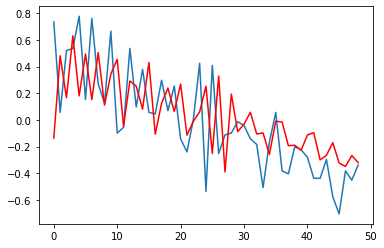

In [41]:
# Plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [48]:
# fit an AR model and save the whole model to file
X = difference(series.values)
# fit model
model = AR(X)
model_fit = model.fit(maxlag=6, disp=False)
# save model to file 
model_fit.save('ar_model.pkl')
# save the differenced dataset 
np.save('ar_data.npy', X)
# save the last ob
np.save('ar_obs.npy', [series.values[-1]])

/Users/hernanlira/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPREC

In [63]:
# load the AR model from file
from statsmodels.tsa.ar_model import ARResults 

model = ARResults.load('ar_model.pkl') 
data = np.load('ar_data.npy') 
last_ob = np.load('ar_obs.npy')

In [64]:
# make prediction
predictions = model.predict(start=len(data), end=len(data))
# transform prediction
yhat = predictions[0] + last_ob[0]
print('Prediction: %f' % yhat)

Prediction: 19.242856


In [68]:
# get real observation
observation = 20

# update and save differenced observation
diffed = observation - last_ob[0]
data2 = np.append(data, [diffed], axis=0)
np.save('ar_data2.npy', data2)

#update and save real observation
last_ob[0] = observation
np.save('ar_obs2.npy', last_ob)

In [69]:
len(data2)

144

In [53]:
data

array([-0.299,  0.369,  0.547, -1.068, -0.142,  0.564, -0.214, -0.112,
       -0.07 , -0.576, -0.521, -0.043, -0.058,  0.101, -0.144, -0.745,
       -0.099, -0.168, -0.409, -0.31 , -0.042, -0.254, -0.689, -0.635,
       -0.38 , -0.157,  0.032,  0.491,  0.297,  0.392, -0.083, -0.55 ,
       -0.128,  0.142,  0.382,  0.28 , -0.083, -0.029, -0.083, -0.099,
       -0.27 ,  0.027, -0.267, -0.494, -0.435, -0.438, -0.126, -0.082,
       -0.03 , -0.155, -0.194, -0.243, -0.254, -0.208, -0.211, -0.187,
       -0.195, -0.155,  0.099,  0.48 ,  0.831,  1.407,  0.254,  0.28 ,
        0.072,  0.139,  0.622,  0.04 , -0.083,  0.425,  0.294,  1.015,
        0.507, -0.326,  0.214,  0.803,  0.281,  0.04 ,  1.327, -0.198,
       -0.114,  0.381,  0.211,  0.198,  0.55 ,  0.323,  0.099, -0.198,
       -0.846,  0.382,  0.873,  0.916,  0.326,  0.026,  0.735,  0.056,
        0.52 ,  0.535,  0.777,  0.154,  0.761,  0.27 ,  0.126,  0.665,
       -0.099, -0.056,  0.536,  0.097,  0.379,  0.056,  0.045,  0.297,
      

In [55]:
data2

array([-0.299,  0.369,  0.547, -1.068, -0.142,  0.564, -0.214, -0.112,
       -0.07 , -0.576, -0.521, -0.043, -0.058,  0.101, -0.144, -0.745,
       -0.099, -0.168, -0.409, -0.31 , -0.042, -0.254, -0.689, -0.635,
       -0.38 , -0.157,  0.032,  0.491,  0.297,  0.392, -0.083, -0.55 ,
       -0.128,  0.142,  0.382,  0.28 , -0.083, -0.029, -0.083, -0.099,
       -0.27 ,  0.027, -0.267, -0.494, -0.435, -0.438, -0.126, -0.082,
       -0.03 , -0.155, -0.194, -0.243, -0.254, -0.208, -0.211, -0.187,
       -0.195, -0.155,  0.099,  0.48 ,  0.831,  1.407,  0.254,  0.28 ,
        0.072,  0.139,  0.622,  0.04 , -0.083,  0.425,  0.294,  1.015,
        0.507, -0.326,  0.214,  0.803,  0.281,  0.04 ,  1.327, -0.198,
       -0.114,  0.381,  0.211,  0.198,  0.55 ,  0.323,  0.099, -0.198,
       -0.846,  0.382,  0.873,  0.916,  0.326,  0.026,  0.735,  0.056,
        0.52 ,  0.535,  0.777,  0.154,  0.761,  0.27 ,  0.126,  0.665,
       -0.099, -0.056,  0.536,  0.097,  0.379,  0.056,  0.045,  0.297,
      

In [70]:
model = ARResults.load('ar_model.pkl') 
data = np.load('ar_data2.npy') 
last_ob = np.load('ar_obs2.npy')

# make prediction
predictions = model.predict(start=len(data), end=len(data))
# transform prediction
yhat = predictions[0] + last_ob[0]
print('Prediction: %f' % yhat)

ValueError: negative dimensions are not allowed